In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# Composition - Changing Over Time
## Dataset: COVID-19 World Vaccination Progress

Este dataset contém dados coletados diariamente do repositório Our World in Data no GitHub para covid-19, mesclados e carregados.

Fonte: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

* Colunas

1. **Country -** este é o país para o qual as informações de vacinação são fornecidas;

2. **Country ISO Code -** sigla do país;

3. **Date -** data para a entrada de dados; para algumas das datas temos apenas as vacinações diárias, para outras, apenas o total (cumulativo);

4. **Total number of vaccinations -** é o número absoluto de imunizações totais no país;

5. **Total number of people vaccinated -** uma pessoa, dependendo do esquema de imunização, receberá uma ou mais (normalmente 2) vacinas; em determinado momento, o número de vacinações pode ser maior do que o número de pessoas;

6. **Total number of people fully vaccinated -** este é o número de pessoas que receberam todo o conjunto de imunização de acordo com o esquema de imunização (normalmente 2); em determinado momento, pode haver um determinado número de pessoas que receberam uma vacina e outro número (menor) de pessoas que receberam todas as vacinas do esquema;

7. **Daily vaccinations (raw) -** para uma determinada entrada de dados, o número de vacinação para aquela data/país;

8. **Daily vaccinations -** para uma determinada entrada de dados, o número de vacinação para aquela data/país;

9. **Total vaccinations per hundred -** razão (em porcentagem) entre o número de vacinações e a população total até a data no país;

10. **Total number of people vaccinated per hundred -** razão (em porcentagem) entre a população imunizada e a população total até a data no país;

11. **Total number of people fully vaccinated per hundred -** razão (em porcentagem) entre a população totalmente imunizada e a população total até a data no país;

12. **Daily vaccinations per million -** razão (em ppm) entre o número de vacinações e a população total para a data atual no país;

13. **Vaccines used in the country -** nome das vacinas utilizadas no país;

14. **Source name -** fonte da informação (autoridade nacional, organização internacional, organização local, etc.);

15. **Source website -** site da fonte de informação.

In [ ]:
df_vacinas_covid = pd.read_csv("/content/drive/Shareddrives/mod5_trabalhopratico/bases/country_vaccinations.csv")
df_vacinas_covid

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4674,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4675,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4676,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


In [ ]:
df_vacinas_covid.isnull().sum()

country                                   0
iso_code                                312
date                                      0
total_vaccinations                     1624
people_vaccinated                      2083
people_fully_vaccinated                2932
daily_vaccinations_raw                 2102
daily_vaccinations                      160
total_vaccinations_per_hundred         1624
people_vaccinated_per_hundred          2083
people_fully_vaccinated_per_hundred    2932
daily_vaccinations_per_million          160
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

## Países que mais vacinaram em todos os meses - TOP 5
### 07/Dez/2020 a 01/Mar/2021

In [ ]:
#Total de vacinas dos países top 5
df_vacinas_top5 = df_vacinas_covid.groupby('country', as_index = False).agg({'total_vaccinations': 'sum'})
df_vacinas_top5 = df_vacinas_top5.astype({'total_vaccinations': 'int64'})
df_vacinas_top5 = df_vacinas_top5.sort_values('total_vaccinations',ascending = False).head(5)
df_vacinas_top5.reset_index(drop = True, inplace = True)
df_vacinas_top5

,country,total_vaccinations
0,United States,1882011126
1,United Kingdom,575310789
2,England,490715805
3,Israel,284592379
4,India,266085353


In [ ]:
#Lista com o nome dos países top 5
vacinas_top5_paises = list(df_vacinas_top5.country)
vacinas_top5_paises

['United States', 'United Kingdom', 'England', 'Israel', 'India']

In [ ]:
#Filtrando dataframe
df_vacinas_top5_paises = df_vacinas_covid[df_vacinas_covid.country.isin(vacinas_top5_paises)].reset_index(drop = True)
df_vacinas_top5_paises

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,England,NaN,2020-12-13,55467.0,55467.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,United States,USA,2021-02-25,68274117.0,46074392.0,21555117.0,1809170.0,1505193.0,20.41,13.78,6.45,4501.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
342,United States,USA,2021-02-26,70454064.0,47184199.0,22613359.0,2179947.0,1552717.0,21.07,14.11,6.76,4643.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
343,United States,USA,2021-02-27,72806180.0,48435536.0,23698627.0,2352116.0,1645240.0,21.77,14.48,7.09,4919.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
344,United States,USA,2021-02-28,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


## Vacinações do Top 5 Países por Semana
### Gráfico de Áreas

In [ ]:
#Adicionando coluna com o número da semana
df_vacinas_top5_paises['date'] = pd.to_datetime(df_vacinas_top5_paises.date)
df_vacinas_top5_paises['week_number'] = df_vacinas_top5_paises['date'].dt.week

df_vacinas_top5_paises

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,week_number
0,England,NaN,2020-12-13,55467.0,55467.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,50
1,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
2,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
3,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
4,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,United States,USA,2021-02-25,68274117.0,46074392.0,21555117.0,1809170.0,1505193.0,20.41,13.78,6.45,4501.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
342,United States,USA,2021-02-26,70454064.0,47184199.0,22613359.0,2179947.0,1552717.0,21.07,14.11,6.76,4643.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
343,United States,USA,2021-02-27,72806180.0,48435536.0,23698627.0,2352116.0,1645240.0,21.77,14.48,7.09,4919.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
344,United States,USA,2021-02-28,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8


In [ ]:
#Total de vacinações por país e por semana
df_vacinas_top5_paises = df_vacinas_top5_paises.total_vaccinations.groupby([df_vacinas_top5_paises['country'],
                                                                            df_vacinas_top5_paises['week_number']])\
                                                                            .agg({'sum'}).reset_index()

df_vacinas_top5_paises = df_vacinas_top5_paises.rename({'sum': 'total_vaccinations'}, axis = 'columns')\
                                 .astype({'total_vaccinations': 'int64'})

df_vacinas_top5_paises

,country,week_number,total_vaccinations
0,England,1,2333764
1,England,2,22489177
2,England,3,36044722
3,England,4,51749196
4,England,5,69414874
5,England,6,86252011
6,England,7,102376660
7,England,8,117391129
8,England,50,55467
9,England,51,574307


In [ ]:
#Apenas as semanas em que os países do top 5 possuem registros
sem = df_vacinas_top5_paises.week_number.value_counts()
df_vacinas_top5_paises = df_vacinas_top5_paises[df_vacinas_top5_paises.week_number.isin(sem.index[sem == 5])]
df_vacinas_top5_paises

,country,week_number,total_vaccinations
1,England,2,22489177
2,England,3,36044722
3,England,4,51749196
4,England,5,69414874
5,England,6,86252011
6,England,7,102376660
7,England,8,117391129
12,India,2,415482
13,India,3,7567199
14,India,4,20340525


In [ ]:
#DF para o gráfico de áreas empilhadas
paises = df_vacinas_top5_paises['country'].unique()
semanas = df_vacinas_top5_paises['week_number'].unique()

dados = {}
for pais in paises:
    dados[pais] = df_vacinas_top5_paises[df_vacinas_top5_paises['country']==pais]['total_vaccinations'].values

df_areas_emp_5 = pd.DataFrame(dados, index = semanas)
df_areas_emp_5 

,England,India,Israel,United Kingdom,United States
2,22489177,415482,15819575,25806728,52021093
3,36044722,7567199,23278826,41277988,111273847
4,51749196,20340525,31982537,59405334,185707415
5,69414874,34502604,37699126,80442019,251153339
6,86252011,43412794,43079925,101847983,328720845
7,102376660,68780830,49247976,121481515,353205135
8,117391129,91065919,55111792,139204900,482444868


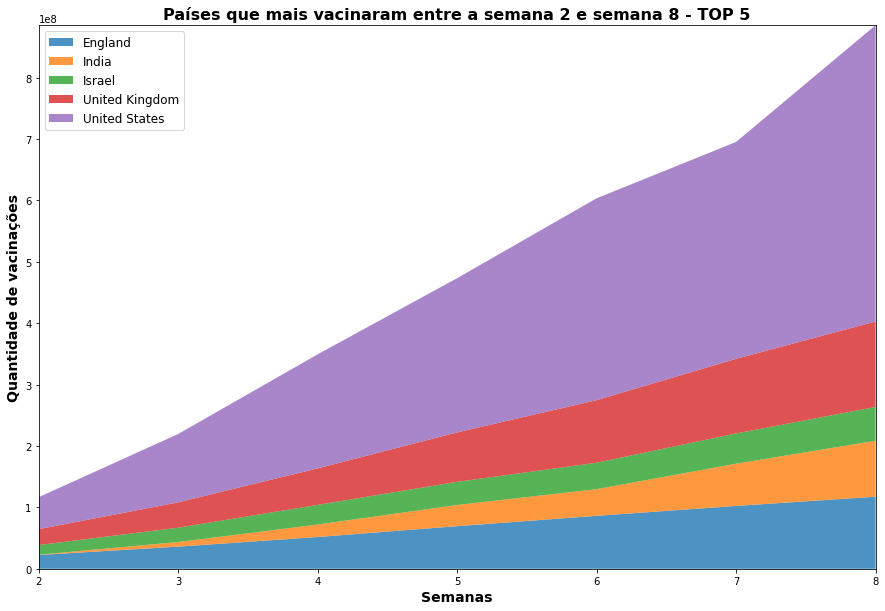

In [ ]:
#Gráfico de áreas empilhadas
plt.figure(figsize = (15,10))

df_temp = df_areas_emp_5
paises = df_temp.columns

x, y = semanas, []

for pais in paises:
    y.append(df_temp[pais].values)

plt.stackplot(x,y, labels = paises, alpha=.8)

plt.title('Países que mais vacinaram entre a semana 2 e semana 8 - TOP 5', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Quantidade de vacinações', weight = 'bold', size = 14)
plt.xticks()
plt.legend(loc = 'upper left', fontsize = 12)
plt.margins(0,0)

plt.show()

In [ ]:
#DF para o gráfico de áreas 100% empilhadas
df_temp = df_areas_emp_5
paises = df_temp.columns

lista = []
for semana in semanas:
    lista.append(df_temp.loc[semana].values / df_temp.loc[semana].sum())

df_areas_emp_5_100 = pd.DataFrame(np.matrix(lista), index = semanas, columns = paises)
df_areas_emp_5_100

,England,India,Israel,United Kingdom,United States
2,0.192954,0.003565,0.135730,0.221418,0.446334
3,0.164256,0.034484,0.106082,0.188104,0.507075
4,0.148200,0.058251,0.091592,0.170126,0.531831
5,0.146689,0.072912,0.079666,0.169992,0.530742
6,0.142964,0.071957,0.071406,0.168814,0.544859
7,0.147285,0.098952,0.070851,0.174770,0.508141
8,0.132613,0.102874,0.062258,0.157255,0.545001


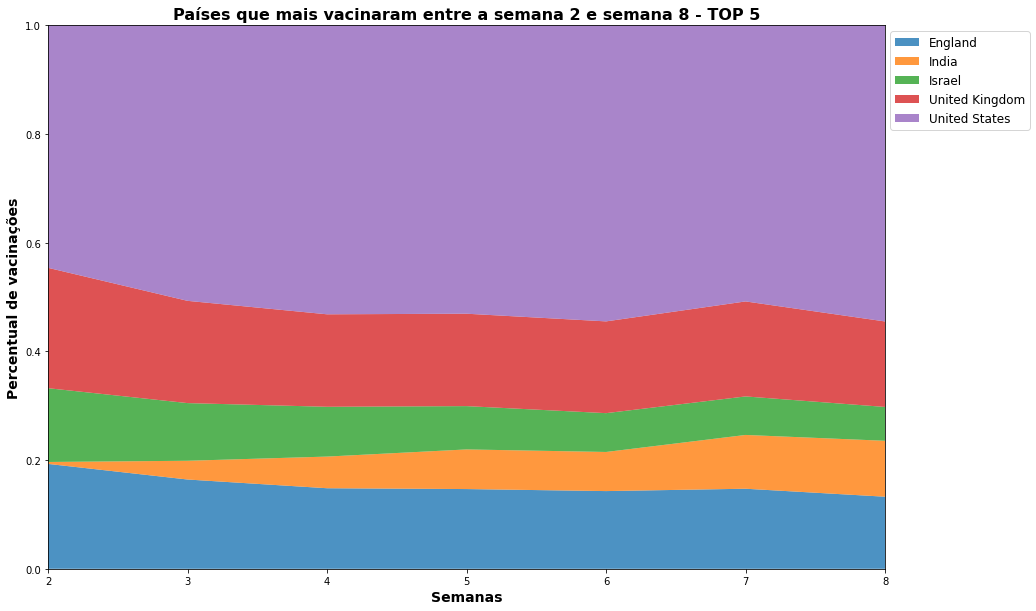

In [ ]:
#Gráfico de áreas 100% empilhadas
plt.figure(figsize=(15,10))

df_temp = df_areas_emp_5_100
paises = df_temp.columns

x, y = semanas, []

for produto in paises:
    y.append(df_temp[produto].values)

plt.stackplot(x,y, labels = paises, alpha = 0.8)

plt.title('Países que mais vacinaram entre a semana 2 e semana 8 - TOP 5', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Percentual de vacinações', weight = 'bold', size = 14)
plt.legend(bbox_to_anchor = (0.68, 0, 0.5, 1), fontsize = 12)
plt.margins(0,0)

plt.show()

In [ ]:
#MESES
# #Total de vacinas por país e mês/ano
# #Separando data em colunas mês e ano
# df_vacinas_top5_paises['date'] = pd.to_datetime(df_vacinas_top5_paises.date)

# df_vacinas_top5_paises = df_vacinas_top5_paises.total_vaccinations.groupby([df_vacinas_top5_paises['country'], df_vacinas_top5_paises['date']\
#                                                          .dt.month.rename('month'), df_vacinas_top5_paises['date']\
#                                                          .dt.year.rename('year')]).agg({'sum'}).reset_index()

# df_vacinas_top5_paises = df_vacinas_top5_paises.rename({'sum': 'total_vaccinations'}, axis = 'columns')\
#                                  .astype({'total_vaccinations': 'int64'})

# df_vacinas_top5_paises

In [ ]:
#MESES
# #Junta mês e ano na mesma coluna
# df_vacinas_top5_paises['date'] = df_vacinas_top5_paises['month'].map(str) + '-' + df_vacinas_top5_paises['year'].map(str)
# df_vacinas_top5_paises['date'] = pd.to_datetime(df_vacinas_top5_paises['date'], format = '%m-%Y').dt.strftime('%m-%Y')

# #Remove as colunas mês e ano
# df_vacinas_top5_paises = df_vacinas_top5_paises.drop(columns = ['month','year'])
# df_vacinas_top5_paises

# #Move coluna data para o inicio do DF
# col = df_vacinas_top5_paises.pop('date')
# df_vacinas_top5_paises.insert(1, col.name, col)

# df_vacinas_top5_paises